In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [8]:
df = pd.read_csv("customer_chrun.csv")
df.sample(5)


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4932  5566-SOEZD    Male              0     Yes        Yes      27   
638   4913-EHYUI    Male              1     Yes        Yes      56   
3448  5949-EBSQK    Male              0     Yes        Yes       4   
412   5233-AOZUF  Female              0     Yes         No      29   
1740  1222-KJNZD    Male              0     Yes        Yes      40   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
4932          Yes            No     Fiber optic                  Yes  ...   
638           Yes           Yes     Fiber optic                  Yes  ...   
3448          Yes            No             DSL                   No  ...   
412           Yes           Yes     Fiber optic                   No  ...   
1740          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4932                   No                   No                   No   
638                   Yes                   No                  Yes   
3448                   No                  Yes                   No   
412                    No                   No                   No   
1740  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
4932                   No        One year              Yes   
638                   Yes        One year              Yes   
3448                  Yes  Month-to-month               No   
412                    No  Month-to-month              Yes   
1740  No internet service  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
4932    Credit card (automatic)          80.65       2209.75    No  
638   Bank transfer (automatic)         104.55       5794.65   Yes  
3448    Credit card (automatic)          61.45        229.55   Yes  
412            Electronic check          74.95       2149.05    No  
1740  Bank transfer (automatic)          20.40         745.3    No  

[5 rows x 21 columns]

In [9]:
# do data exploration 
# drop customerID as it is useless

df.drop('customerID' , axis='columns' , inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# here total charges is object which should be float

df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
# check type of montly charges

df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [12]:
# covert type into numbers

pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [13]:
# we are getting the error as there are some values which having the space so first remove the space 

# says that wheather the value is null or not 
pd.to_numeric(df.TotalCharges , errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
# show which row having the total charges null

df[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [16]:
# 11 rows and 12 columans which have value null and we need to drop it 

df[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()].shape

(11, 20)

In [18]:
# shows orignal database

df.shape

(7043, 20)

In [19]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [20]:
# creating a new dataset-df1 having the totalCharges not isequal to " "

df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [23]:
# as we have drop the rows which having the totalcharges as blank
# so now you can change the object into float

pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [25]:

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
# datatype is change into float now 
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [27]:
df1.TotalCharges.dtypes

dtype('float64')

In [43]:
# gives the rows which having churn === No

df1[df1.Churn == 'No']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
3       Male              0      No         No      45           No   
6       Male              0      No        Yes      22          Yes   
7     Female              0      No         No      10           No   
...      ...            ...     ...        ...     ...          ...   
7037  Female              0      No         No      72          Yes   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0     No phone service             DSL                   No   
1                   No             DSL                  Yes   
3     No phone service             DSL                  Yes   
6                  Yes     Fiber optic                   No   
7     No phone service             DSL                  Yes   
...                ...             ...                  ...   
7037                No              No  No internet service   
7038               Yes             DSL                  Yes   
7039               Yes     Fiber optic                   No   
7040  No phone service             DSL                  Yes   
7042                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                  Yes                   No   
3                      No                  Yes                  Yes   
6                     Yes                   No                   No   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No        One year   
3                      No                   No        One year   
6                     Yes                   No  Month-to-month   
7                      No                   No  Month-to-month   
...                   ...                  ...             ...   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
3                  No  Bank transfer (automatic)           42.30   
6                 Yes    Credit card (automatic)           89.10   
7                  No               Mailed check           29.75   
...               ...                        ...             ...   
7037              Yes  Bank transfer (automatic)           21.15   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
70

In [44]:
 df1[df1.Churn == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

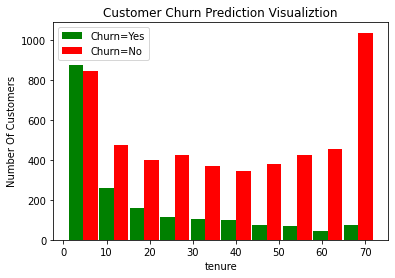

In [49]:
# just store the values
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

# do labling
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


# to plot 
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
# to display label
plt.legend()

# what we observe from this chart is that people who are with the company for a long time there majority of not  leaving
# this plot is for 10yr

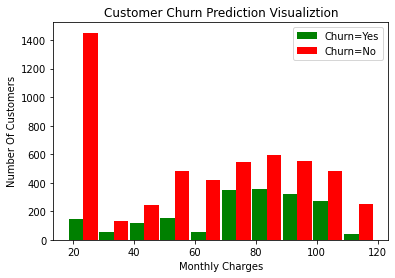

In [50]:
# instead of 10yr we have now the chart of monthly charges mc

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# monthly charges looks affordabe to the customer because most of the customer are not churing i.e the red bar is always higher than green bar
# company shouldnt be confused on the pricing plans rather than should focused on soe other factoer that making customer churn


In [51]:
# find out the unique value from the  col having the datatype as object
# print_unique_col_values - it is a function 

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [52]:
# print all the values having the unique col 

print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [54]:
# so what we observe that  'No internet service' == No 'No phone service' == No 
# so just relace it with no 
# we are in data cleaning phase

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19204\3094735290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19204\3094735290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [55]:
print_unique_col_values(df1)
# here we can say that all things is replaced successfully

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [57]:
#as we no machine learing model do not understand text so we need to convert oll the text into numbers 

# so lets convert yes and no with 1 and 0 

# array of the col having values as yes and no
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# here we are using for loop to replace yess with 1 and no with 0
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19204\2757059446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [58]:
# so we can say that all yes and no is replaced successfully
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [59]:
# replace femlae with 1 and male with 0
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19204\3390430912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [60]:
df1.gender.unique()


array([1, 0], dtype=int64)

In [62]:
# one to one hot and coding 
# InternetService: ['DSL' 'Fiber optic' 'No']
# so what we are doing here is creating 3 seprate cols for the one single col InternetService
# and similary for ontract and Payment method

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

# InternetService = 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No'
# Contract = 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'
# 'PaymentMethod = 'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:
# now the vaules are stored in the form of 0 and 1 for the newly created cols
df2.sample(5)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
6180       1              1        0           0      66             1   
5299       1              1        1           0      28             1   
2897       0              0        0           0      43             1   
1626       0              0        0           0      20             1   
875        1              0        0           0       3             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
6180              1               1             0                 0  ...   
5299              1               0             0                 0  ...   
2897              1               0             0                 0  ...   
1626              1               1             0                 0  ...   
875               0               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
6180                    0                            1                   0   
5299                    0                            1                   0   
2897                    0                            0                   1   
1626                    1                            0                   0   
875                     1                            0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
6180                        0                  0                  1   
5299                        1                  0                  0   
2897                        0                  0                  1   
1626                        1                  0                  0   
875                         1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
6180                                        1   
5299                                        0   
2897                                        1   
1626                                        1   
875                                         0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6180                                      0                               0   
5299                                      1                               0   
2897                                      0                               0   
1626                                      0                               0   
875                                       1                               0   

      PaymentMethod_Mailed check  
6180                           0  
5299                           0  
2897                           0  
1626                           0  
875                            0  

[5 rows x 27 columns]

In [64]:
df2.dtypes
# now all data types are in numbers not text 

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [70]:
# below mention cols is not in 0 and 1 format so we need to scale it 
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# from sklearn we are impoerting minmaxscalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from minmaxscalar you are not calling fit_transform  and storing it df2 frame
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [72]:
#now we can say that values are in 0 to 1 ramge

for col in df2:
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [73]:
# now our data frame is ready to used in machine learing 

# lets train and split the model now 

# now our x is with all the cols excpect churn 
# and y is only col with churn 
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# lets d
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [74]:
# using 80% cols for trainig
X_train.shape


(5625, 26)

In [75]:
# 20% cols for spliting ..
#splting means nothing  but the testing perpose wheather the 80% train model is accurate trainned or not is checked by passing 20% test cases
X_test.shape

(1407, 26)

In [76]:
X_train[:10]


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5664       1              1        0           0  0.126761             1   
101        1              0        1           1  0.000000             1   
2621       0              0        1           0  0.985915             1   
392        1              1        0           0  0.014085             1   
1327       0              0        1           0  0.816901             1   
3607       1              0        0           0  0.169014             1   
2773       0              0        1           0  0.323944             0   
1936       1              0        1           0  0.704225             1   
5387       0              0        0           0  0.042254             0   
4331       0              0        0           0  0.985915             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5664              0               0             0                 1  ...   
101               0               0             0                 0  ...   
2621              0               0             1                 1  ...   
392               0               0             0                 0  ...   
1327              1               0             0                 1  ...   
3607              0               1             0                 0  ...   
2773              0               0             0                 1  ...   
1936              0               1             1                 0  ...   
5387              0               0             0                 0  ...   
4331              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5664                    0                            1                   0   
101                     0                            0                   1   
2621                    1                            0                   0   
392                     1                            0                   0   
1327                    0                            1                   0   
3607                    1                            0                   0   
2773                    1                            0                   0   
1936                    1                            0                   0   
5387                    1                            0                   0   
4331                    0                            0                   1   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5664                        1                  0                  0   
101                         1                  0                  0   
2621                        0                  0                  1   
392                         1                  0                  0   
1327                        0                  1                  0   
3607                        0                  1                  0   
2773                        1                  0                  0   
1936                        0                  1                  0   
5387                        1                  0                  0   
4331                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
5664                                        0   
101                                         0   
2621                                        0   
392                                         0   
1327                                        1   
3607                                        0   
2773                                        0   
1936                                        1   
5387                                        0   
4331                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5664                                      1                             

In [77]:
# churn col is removed so 26
len(X_train.columns)


26

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SVMmodel = make_pipeline(StandardScaler(), SVC(gamma='auto'))

SVMmodel.fit(X_train,y_train)
#y_pred=SVMmodel.predict(X_test)
SVMmodel.predict(X_test)


accuracy = SVMmodel.score(X_test, y_test)
print("SVMModel Accuracy : %s" % "{0:.10%}".format(accuracy))

# checking the acuracy of the 20% testing 



SVMModel Accuracy : 77.7540867093%


In [92]:
yp = model.predict(X_test)
yp[:5]

NameError: name 'model' is not defined